# Model Build & Deploy

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from copy import deepcopy #copy a dataframe without reassigning, wholly new copy, nested elements as well completely seperate

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score

## Fix Imbalance of Our Target

#### Target Variable Balance

In [ ]:
df['income'].value_counts(normalize=True)*100

income
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64

> Imbalanced! Options to Correct: SMOTE, RandomOverSampler, Near-Links

#### Barplot for Income

<Axes: xlabel='age', ylabel='income'>

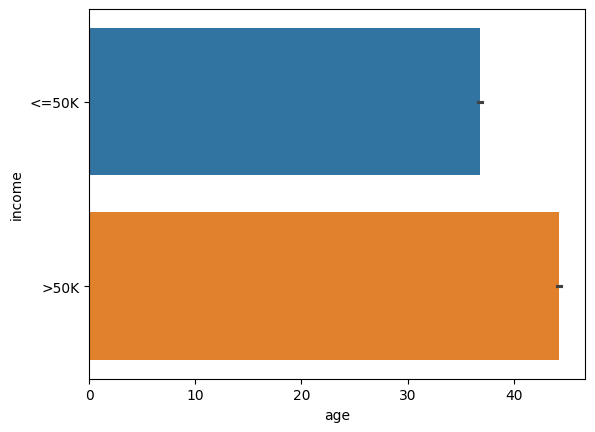

In [ ]:
sns.barplot(df, x='age', y='income', hue='income')

### RandomOverSampler - Method 1

In [ ]:
from imblearn.over_sampling import RandomOverSampler
def ros_sample(dx, dy):
    ros = RandomOverSampler(random_state=1)
    ros.fit(dx,dy)
    return ros.fit_resample(dx,dy)

Xs, ys = ros_sample(X,y)
Xzs, yzs = ros_sample(Xz,yz)
Xqs, yqs = ros_sample(Xq,yq)

##### Confirm Balance!

In [ ]:
ys.value_counts(normalize=True)*100

income
0    50.0
1    50.0
Name: proportion, dtype: float64

<Axes: xlabel='income'>

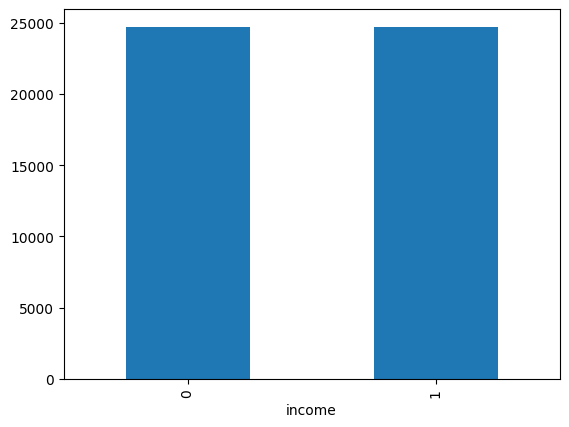

In [ ]:
ys.value_counts().plot(kind='bar')

> Success!

### SMOTE - Method 2
- SMOTE (ONLY NUMERICAL) vs. SMOTENC (NUMERICAL + CATEGORY)

In [ ]:
from imblearn.over_sampling import SMOTE
def smote_sample(dx, dy):
    #Initialize
    sm = SMOTE(random_state=1)
    #Fit
    sm.fit_resample(dx,dy)
    return sm.fit_resample(dx,dy)

Xs_sm, ys_sm = smote_sample(X,y)
Xzs_sm, yzs_sm = smote_sample(Xz,yz)
Xqs_sm, yqs_sm = smote_sample(Xq,yq)

##### Confirm Balance!

In [ ]:
ys_sm.value_counts(normalize=True)*100

income
0    50.0
1    50.0
Name: proportion, dtype: float64

<Axes: xlabel='income'>

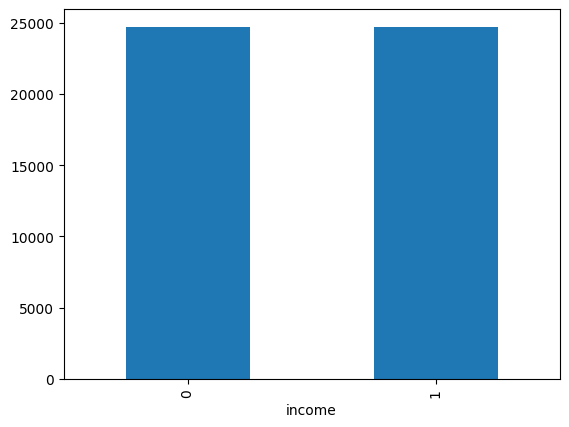

In [ ]:
ys_sm.value_counts().plot(kind='bar')

## Train & Test Splits

In [ ]:
X = df.drop(['Rented Bike Count', 'Date'], axis = 1) #Can drop date as well since we have other extracted features
y = df['Rented Bike Count']
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Perform Scaling on the Data

In [ ]:
# Works best on features with large range to it: 'Visibility (10m)','Humidity(%)', 'Dew point temperature(�C)', 'Snowfall (cm)', 'Rainfall(mm)', 'Temperature(C)'
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,8760,2018-05-31 23:59:59.999999744,2017-12-01 00:00:00,2018-03-02 00:00:00,2018-06-01 00:00:00,2018-08-31 00:00:00,2018-11-30 00:00:00,NaN
Rented Bike Count,8760.0,732.006849,2.0,221.0,576.0,1065.25,3556.0,631.974431
Hour,8760.0,11.5,0.0,5.75,11.5,17.25,23.0,6.922582
Temperature(°C),8760.0,12.882922,-17.799999,3.5,13.7,22.5,39.400002,11.944825
Humidity(%),8760.0,58.226256,0.0,42.0,57.0,74.0,98.0,20.362413
Wind speed (m/s),8760.0,1.724909,0.0,0.9,1.5,2.3,7.4,1.0363
Visibility (10m),8760.0,1436.825799,27.0,940.0,1698.0,2000.0,2000.0,608.298712
Dew point temperature(°C),8760.0,4.073813,-30.6,-4.7,5.1,14.8,27.200001,13.060369
Solar Radiation (MJ/m2),8760.0,0.569111,0.0,0.0,0.01,0.93,3.52,0.868746
Rainfall(mm),8760.0,0.148687,0.0,0.0,0.0,0.0,35.0,1.128193


- Not too much different (meaning small range) so might not make sense to scale
- Visibility does have a high range

In [ ]:
#for StandardScalar
trans_ss = StandardScaler() #Initialize
#fit on numeric with large
df_ss = trans_ss.fit_transform(X[['Visibility (10m)','Humidity(%)', 'Dew point temperature(�C)', 'Snowfall (cm)', 'Rainfall(mm)', 'Temperature(C)']])
df_ss
# X1 = pd.DataFrame(df_ss, columns=df.columns)


In [ ]:
#for MinMaxScalar
trans_ss = MinMaxScaler() #Initialize
#fit on numeric with large range
df_ss = trans_ss.fit_transform(X[['Visibility (10m)','Humidity(%)', 'Dew point temperature(�C)', 'Snowfall (cm)', 'Rainfall(mm)', 'Temperature(C)']])
df_ss
# X1 = pd.DataFrame(df_ss, columns=df.columns)

In [ ]:
X_ss = deepcopy(X) #Deepcopy of X
X_ss[['Visibility (10m)','Humidity(%)', 'Dew point temperature(�C)', 'Snowfall (cm)', 'Rainfall(mm)', 'Temperature(C)']] = df_ss #Standard scalar to those columns?

X_train1, x_test1, y_train1, y_test1 = train_test_split(X_ss, y, test_size=0.2, random_state=1)

### Standard Scalar

In [ ]:
from sklearn.preprocessing import StandardScaler

def standard_scaler(data): #pass in our dataframe
    """Applies Standard Scaler to every column and returns the modified dataframe"""
    
    for col in data.columns:
        if col == 'income':
            continue #skip it so it doesn't scale our classification target
        else:
            #Instantiate
            ss = StandardScaler()
            #Fit + Transform
            data[col] = ss.fit_transform(data[col].values.reshape(-1,1))

    return data

# Pass in Dataframe to Apply it to all Normal, Z-Score, Quantile Dataframes
df = standard_scaler(df)
dfz = standard_scaler(dfz)
dfq = standard_scaler(dfq)

#### Confirm Scaled

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,3.769612,-2.65732,-1.067997,0.181332,-0.420060,2.249480,-1.554283,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-0.035429,0.291569,0
1,3.183112,0.09005,-0.539169,0.181332,-0.420060,2.249480,-0.608387,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-1.817204,0.291569,0
2,2.010110,-2.65732,-0.035220,1.214869,-0.031360,2.249480,-1.554283,1.589322,-1.962621,-1.422331,-0.14592,10.593507,-0.035429,0.291569,0
3,1.130359,0.09005,-0.468215,-1.368974,-2.363558,-1.734058,0.101036,1.589322,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.291569,0
4,0.177296,0.09005,0.709482,1.214869,-0.031360,1.585557,0.810458,0.966947,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.291569,0


## Model Build: Linear Regression, Lasso, & Ridge Regression

Linear Regression

In [ ]:
#Unscaled Data
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
#Scaled Data
lin_reg1 = LinearRegression()
lin_reg1.fit(X_train1,y_train1)

LinearRegression()

Lasso Regression

In [ ]:
#Unscaled Data
lasso = Lasso(alpha=0.1, max_iter=10000).fit(X_train, y_train)
#Scaled Data
lasso1 = Lasso(alpha=0.5, max_iter=10000).fit(X_train1, y_train1)

Ridge Regression

In [ ]:
#Unscaled Data
ridge = Ridge(alpha=1).fit(X_train, y_train)
#Scaled Data
ridge1 = Ridge(alpha=0.5).fit(X_train1, y_train1)

Random Forest Regressor

In [ ]:
#Unscaled Data
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
#Scaled Data
rf1 = RandomForestRegressor()
rf1.fit(X_train1, y_train1)

RandomForestRegressor()

### Model Metrics: R2, RMSE, MAE

#### Automate for All Models

In [ ]:
Model = ["Linear", 'Lasso', "Ridge","Linear1", 'Lasso1', "Ridge1","RF", "RF1"]
for i, model in enumerate([lin_reg, lasso, ridge,lin_reg1, lasso1, ridge1, rf, rf1]):
    if i >2 :
        y_pred = model.predict(x_test1)
        # y_test = y_test1
        # print(Model[i])
    else:
        y_pred = model.predict(x_test)
    print(f"{Model[i]} : R2 = {r2_score(y_test, y_pred)} RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))} MAE = {mean_absolute_error(y_test, y_pred)}")

Linear : R2 = 0.5287197269406916 RMSE = 431.17836801992405 MAE = 320.2537575778735
Lasso : R2 = 0.5287251065276771 RMSE = 431.17590709774134 MAE = 320.21126200180316
Ridge : R2 = 0.5287297943534757 RMSE = 431.17376261413375 MAE = 320.23786663078954
Linear1 : R2 = 0.5287197269406916 RMSE = 431.17836801992405 MAE = 320.2537575778732
Lasso1 : R2 = 0.5283293245240961 RMSE = 431.3569223109492 MAE = 320.6876239942194
Ridge1 : R2 = 0.5286324549776392 RMSE = 431.2182891059939 MAE = 320.28133125376
RF : R2 = 0.2309051816737775 RMSE = 550.816925025113 MAE = 354.43966324200915
RF1 : R2 = 0.8971348842510827 RMSE = 201.44263483078373 MAE = 112.3311700913242


In [ ]:
#Check model coefficients and get rid of unimportant ones
ridge.coef_

Observation:
- Features don't really have any linear correlations so that might impact - linear assumptions not being met
- Not very different with scaling (even attempted MinMax as well)
> Try GridSearchCV for hyperparameter tuning
> Get rid of scaling since doesn't impact
> Consider changing some of the other features that had lots of zeroes to categorical (1 vs. 0) - easier for the model
> Add Seasonal Data Features to Model


#### Random Forest Feature Importances

In [ ]:
#Unscaled Data
for i, val in enumerate(rf.feature_importances_):
    print(rf.feature_names_in_[i], val)

Hour 0.2884819185568509
Temperature(C) 0.3428934245052427
Humidity(%) 0.07484820722202667
Wind speed (m/s) 0.011324123885945751
Visibility (10m) 0.01251175560751528
Dew point temperature(�C) 0.026636211280280563
Solar Radiation (MJ/m2) 0.09427752124849885
Rainfall(mm) 0.041375400972338966
Snowfall (cm) 0.0005532514748014572
Holiday 0.006036499795528718
Functioning Day 0.0
Day 0.01403565544364223
Month 0.02256744988753317
DoW 0.023457177783298252
Weekend 0.014972352484660898
Seasons_Spring 0.0028583882789834404
Seasons_Summer 0.0012627510476764653
Seasons_Winter 0.021907910525175763


In [ ]:
#Scaled Data (with MinMaxScaling)
for i, val in enumerate(rf1.feature_importances_):
    print(rf1.feature_names_in_[i], val)

Hour 0.29092992175613414
Temperature(C) 0.34150856389777695
Humidity(%) 0.07340595435611799
Wind speed (m/s) 0.01175389938129023
Visibility (10m) 0.012763087886097953
Dew point temperature(�C) 0.027051677866809218
Solar Radiation (MJ/m2) 0.09282903876407346
Rainfall(mm) 0.042472052952097175
Snowfall (cm) 0.0005213919616559324
Holiday 0.005365438175536822
Functioning Day 0.0
Day 0.013824626210113534
Month 0.02281738673476701
DoW 0.023422374435439677
Weekend 0.014534386190223405
Seasons_Spring 0.0029943250505714155
Seasons_Summer 0.0011796105063963153
Seasons_Winter 0.022626263874898713


## Comparing Multiple Dataframes on Multiple Models

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # Without sampling
X_trains, x_tests, y_trains, y_tests = train_test_split(Xs, ys, test_size=0.2, random_state=1) # With random sampling
X_trainz, x_testz, y_trainz, y_testz = train_test_split(Xzs, yzs, test_size=0.2, random_state=1) # With random oversampling + zscore treatment
X_trainq, x_testq, y_trainq, y_testq = train_test_split(Xqs, yqs, test_size=0.2, random_state=1) # With random oversampling + quantile treatment

## Deploy Models and Evaluate

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


In [ ]:
#List to cycle through all our test and trains
trainX = [X_train,X_trains,X_trainz,X_trainq,]
trainy = [y_train,y_trains,y_trainz,y_trainq,]
testX = [x_test,x_tests,x_testz,x_testq,]
testy = [y_test,y_tests,y_testz,y_testq,]

# List of Type of Dataframe
tname = [ 'normal', 'scaler', 'zscore', 'quantile']
# List of Models
models = [LogisticRegression(random_state=1), svm.SVC(random_state=1), GaussianNB(), 
          KNeighborsClassifier(), DecisionTreeClassifier(random_state=1), RandomForestClassifier(random_state=1) ]
names = ['LR', 'SV', 'NB', 'KN', 'DT', 'RF']

print(' Name        Accuracy        Precision       Recall      F1')

for i, name in enumerate(names): #first variable is counter, 2nd is whatever assign it to
    for j in range(len(trainX)):
        #Initialize
        model = models[i]
        #Fit
        model.fit(trainX[j], trainy[j])
        #Predict
        y_pred = model.predict(testX[j])
        #Print Metrics - give name, type of dataframe
        print(f'''{name}_{tname[j]} = {accuracy_score(testy[j], y_pred)} : {precision_score(testy[j], y_pred)} : {recall_score(testy[j], y_pred)} : {f1_score(testy[j], y_pred)}''')
    

 Name     Accuracy     Precision      Recall     F1
LR_normal = 0.8295716259788116 : 0.7233009708737864 : 0.4745222929936306 : 0.573076923076923
LR_scaler = 0.769923139158576 : 0.7624798711755234 : 0.7757526110997338 : 0.7690589787838799
LR_zscore = 0.7642934196332255 : 0.7564402810304449 : 0.7734000870700914 : 0.7648261758691206
LR_quantile = 0.7712378640776699 : 0.7643736130724228 : 0.7759574032357157 : 0.7701219512195122
SV_normal = 0.8530631045601106 : 0.7621899059024807 : 0.567515923566879 : 0.6506024096385542
SV_scaler = 0.8356593851132686 : 0.7978062157221206 : 0.8937128814253532 : 0.8430406645416787
SV_zscore = 0.8274002157497303 : 0.7854691075514875 : 0.8966042664344798 : 0.8373653181540963
SV_quantile = 0.8361650485436893 : 0.7984269251874886 : 0.8939176735613352 : 0.8434782608695652
NB_normal = 0.8062336864732075 : 0.6959287531806616 : 0.3484076433121019 : 0.46434634974533107
NB_scaler = 0.7140978964401294 : 0.8784977908689249 : 0.4886340364530002 : 0.6279773654428215
NB_zsc